In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import to_datetime

In [13]:
df = pd.read_csv("raw_analyst_ratings.csv")

In [14]:
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [19]:
df['date'] = to_datetime(df['date'] , format='mixed', utc=True)

In [34]:
daily_counts = df.groupby(df['date'].dt.date).size()

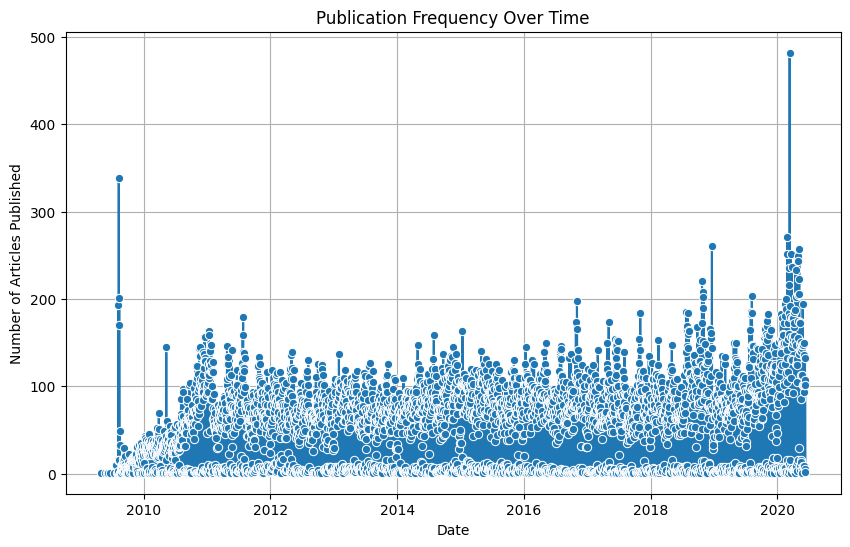

In [35]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=daily_counts.index, y=daily_counts.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Articles Published')
plt.title('Publication Frequency Over Time')
plt.grid(True)
plt.show()

In [43]:
df['hour_of_day'] = df['date'].dt.hour
hourly_counts = df.groupby('hour_of_day').size()

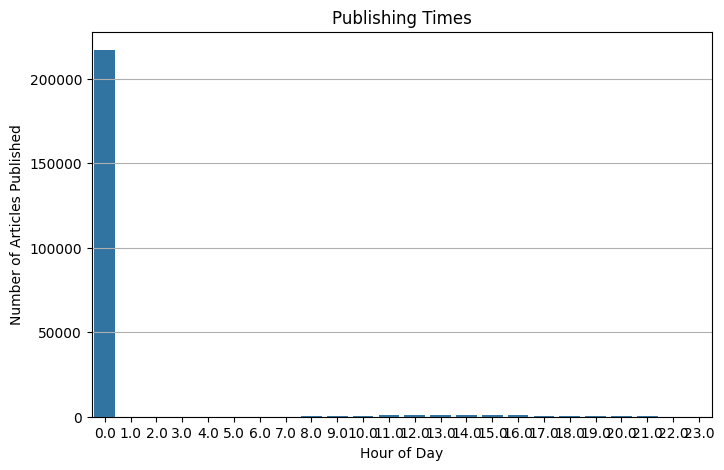

In [44]:
plt.figure(figsize=(8, 5))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Articles Published')
plt.title('Publishing Times')
plt.grid(axis='y')
plt.xticks(range(24))
plt.show()
# I have faced aloot of challenges on working with time and this one is also part of the challenge I am working on still now.